In [81]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pyaudio

## Record Audio

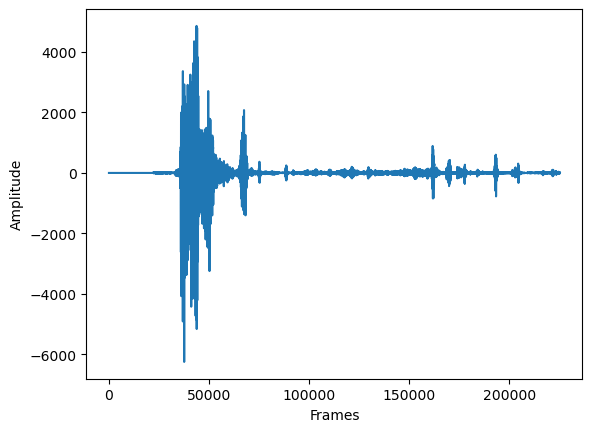

In [82]:
FORMAT = pyaudio.paInt16
SAMPLEFREQ = 44100
FRAMESIZE = 1024
NOFFRAMES = 220
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT, channels=1, rate=SAMPLEFREQ, input=True, frames_per_buffer=FRAMESIZE)
data = stream.read(NOFFRAMES*FRAMESIZE)
decoded = np.frombuffer(data, "int16")
stream.stop_stream()
stream.close()


plt.plot(decoded)
plt.ylabel("Amplitude")
plt.xlabel("Frames")
plt.show()



# Input normalisieren

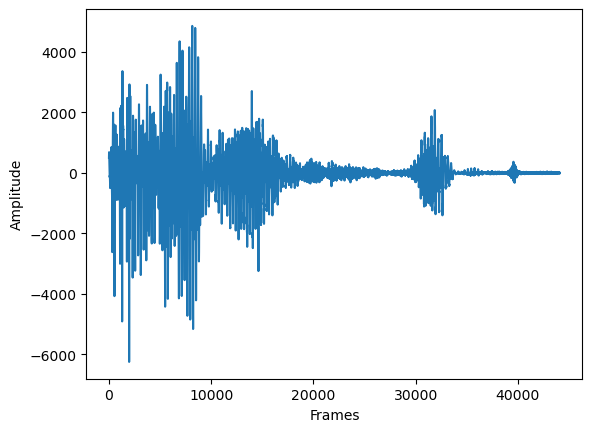

In [83]:
for i, v in enumerate(decoded):
    if v > 500:
        decoded = decoded[i:]
        break
if len(decoded) > SAMPLEFREQ:
    decoded = decoded[:SAMPLEFREQ]
while len(decoded) < SAMPLEFREQ:
    np.append(decoded, 0)

plt.plot(decoded)
plt.ylabel("Amplitude")
plt.xlabel("Frames")
plt.show()

np.save("Jonas1", decoded)

# Import npy file

In [84]:
data = np.load("Jonas1.npy")

# Amplitudenspektrum

Text(0.5, 1.0, 'Amplitude Spectrum')

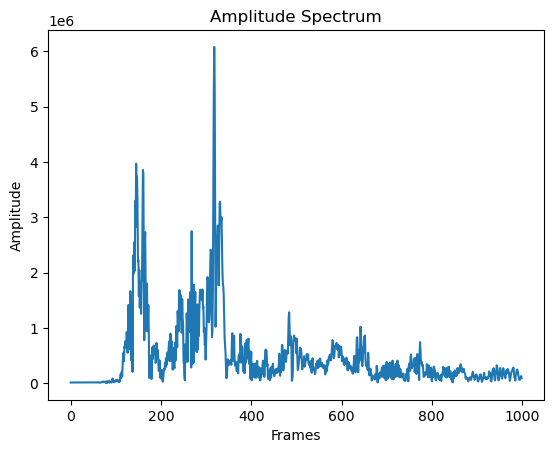

In [113]:
fourier_transform = np.fft.fft(data)
amplituden = np.abs(fourier_transform)

plt.plot(amplituden[:1000])
plt.xlabel('Frames')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')

# Windowing

43.06640625


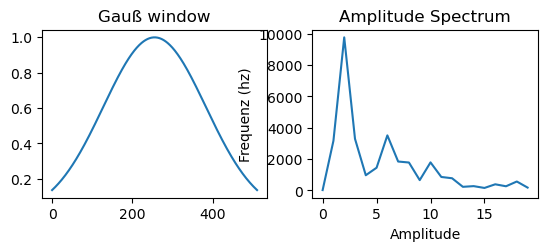

In [122]:
print(SAMPLEFREQ/512/2)
windowSize = 512
window = scipy.signal.windows.gaussian(windowSize, std=windowSize/4)
windows_fft = []

for i in range(0, SAMPLEFREQ, int(windowSize/2)):
    localData = data[i:i+windowSize]
    if len(localData) != 512:
        continue
    localAmpl = np.fft.fft(localData*window)
    windows_fft.append(localAmpl)
    # plt.subplot(1,3,1)
    # plt.plot(window * localData)
    # plt.subplot(1,3,2)
    # plt.plot(localData)
    # plt.subplot(1,3,3)
    # plt.plot(window)
    # plt.show()
    # break
mean_fft = np.array(windows_fft).mean(axis=0)
amplituden = np.abs(mean_fft)
plt.subplot(2,2,1)
plt.plot(window)
plt.title("Gauß window")
plt.subplot(2,2,2)
plt.plot(amplituden[:20])
plt.title("Amplitude Spectrum")
plt.xlabel("Amplitude")
plt.ylabel("Frequenz (hz)")
plt.show()